# Title

## Contents 
1. [<span style="color:black">Import packages</span>](#1) <a id="one"></a>  
2. [<span style="color:black">Read in data</span>](#2)  <a id="two"></a>  
3. [<span style="color:black">Sum of frequency per provenance per year in types/context date ranges</span>](#3) <a id="three"></a>  
4. [<span style="color:black">Site count per provenance per year in types/context date ranges</span>](#4)  <a id="four"></a>   
5. [<span style="color:black">Amphora type count per provenance type per year in types/context date ranges</span>](#5)  <a id="five"></a>  
6. [<span style="color:black">Plot line graphs</span>](#6) <a id="six"></a>  

### [<span style="color:black">1. Import packages</span>](#one) <a id="1"></a> 

In [1]:
import sys

sys.path.append("../sonata")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from calculation import sum_freq_per_year, year_freq_df, year_object_count_df
from plot import plot_graph 

### [<span style="color:black">2. Read in data</span>](#two)  <a id="2"></a>

In [2]:
data = pd.read_csv("../../data/Sonata_data_site_contents.csv") 

provenance = ["aegean", "anatolia", "orient", "tripolitania"] 
start_dates = ["Amphora_type_lower_date", "Lower_context_date"]
end_dates = ["Amphora_type_upper_date", "Upper_context_date"]

freq_type_dates = {}
freq_context_dates = {}

site_count_type_dates = {}
site_count_context_dates = {}

type_count_type_dates = {}
type_count_context_dates = {}

list_of_dfs = []

### [<span style="color:black">3. Sum of frequency per provenance per year in types/context date ranges</span>](#three) <a id="3"></a>

In [3]:
for prov in provenance:
    for start, end in zip(start_dates, end_dates):

        df = data.groupby(["Amphora_type", start, end, "Provenance"])["Frequency"].sum()
        df = df.reset_index()
        df = df.rename(columns = {"Frequency":"summed_freq"})

        df1 = sum_freq_per_year(data = df,
                                sum_freq = "summed_freq",
                                lower_date = start,
                                upper_date = end)

        freq = year_freq_df(data = df1[df1["Provenance"] == prov],     
                            lower_date = start,
                            upper_date = end,
                            sum_freq = "Sum_freq_per_year")   
        
        label = prov.capitalize()
        
        if "Amphora" in start or "Amphora" in  end:   
            freq_type_dates[label] = freq
        else:
            freq_context_dates[label] = freq
            
list_of_dfs.append(freq_type_dates)
list_of_dfs.append(freq_context_dates)

### [<span style="color:black">4. Site count per provenance per year in types/context date ranges</span>](#four) <a id="4"></a>  

In [4]:
for prov in provenance:
    for start, end in zip(start_dates, end_dates):
        df = data.groupby(["Amphora_type", start, end, "Provenance"])["Grouped_sites"].apply(lambda x: ",".join(x))
        df = df.apply(lambda x: x.split(','))
        df = df.reset_index()
        df = df.rename(columns = {"Grouped_sites":"List_of_sites"})

        count_sites = year_object_count_df(data = df[df["Provenance"] == prov],
                                           lower_date = start,  
                                           upper_date = end,
                                           object_list = "List_of_sites") 
        label = prov.capitalize()

        if "Amphora" in start or "Amphora" in end:   
            site_count_type_dates[label] = count_sites
        else:
            site_count_context_dates[label] = count_sites

list_of_dfs.append(site_count_type_dates)
list_of_dfs.append(site_count_context_dates)

### [<span style="color:black">5. Amphora type count per provenance per year in types/context date ranges</span>](#five) <a id="5"></a>

In [5]:
for prov in provenance:
    for start, end in zip(start_dates, end_dates):
        df = data.groupby([start, end, "Provenance"])["Amphora_type"].apply(list)
        df = df.reset_index()
        df = df.rename(columns = {"Amphora_type":"List_of_types"})

        type_count = year_object_count_df(data = df[df["Provenance"] == prov], 
                                          lower_date = start,  
                                          upper_date = end,
                                          object_list = "List_of_types")  
        label = prov.capitalize()

        if "Amphora" in start or "Amphora" in end:   
            type_count_type_dates[label] = type_count
        else:
            type_count_context_dates[label] = type_count
            
list_of_dfs.append(type_count_type_dates)
list_of_dfs.append(type_count_context_dates)

### [<span style="color:black">6. Plot line graphs</span>](#six) <a id="6"></a>

/tmp/ipykernel_14492/2569905009.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
/tmp/ipykernel_14492/2569905009.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
/tmp/ipykernel_14492/2569905009.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
/tmp/ipykernel_14492/2569905009.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
/tmp/ipykernel_14492/2569905009.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
/tmp/ipykernel_14492/2569905009.py:23: UserWarning: FixedFormatte

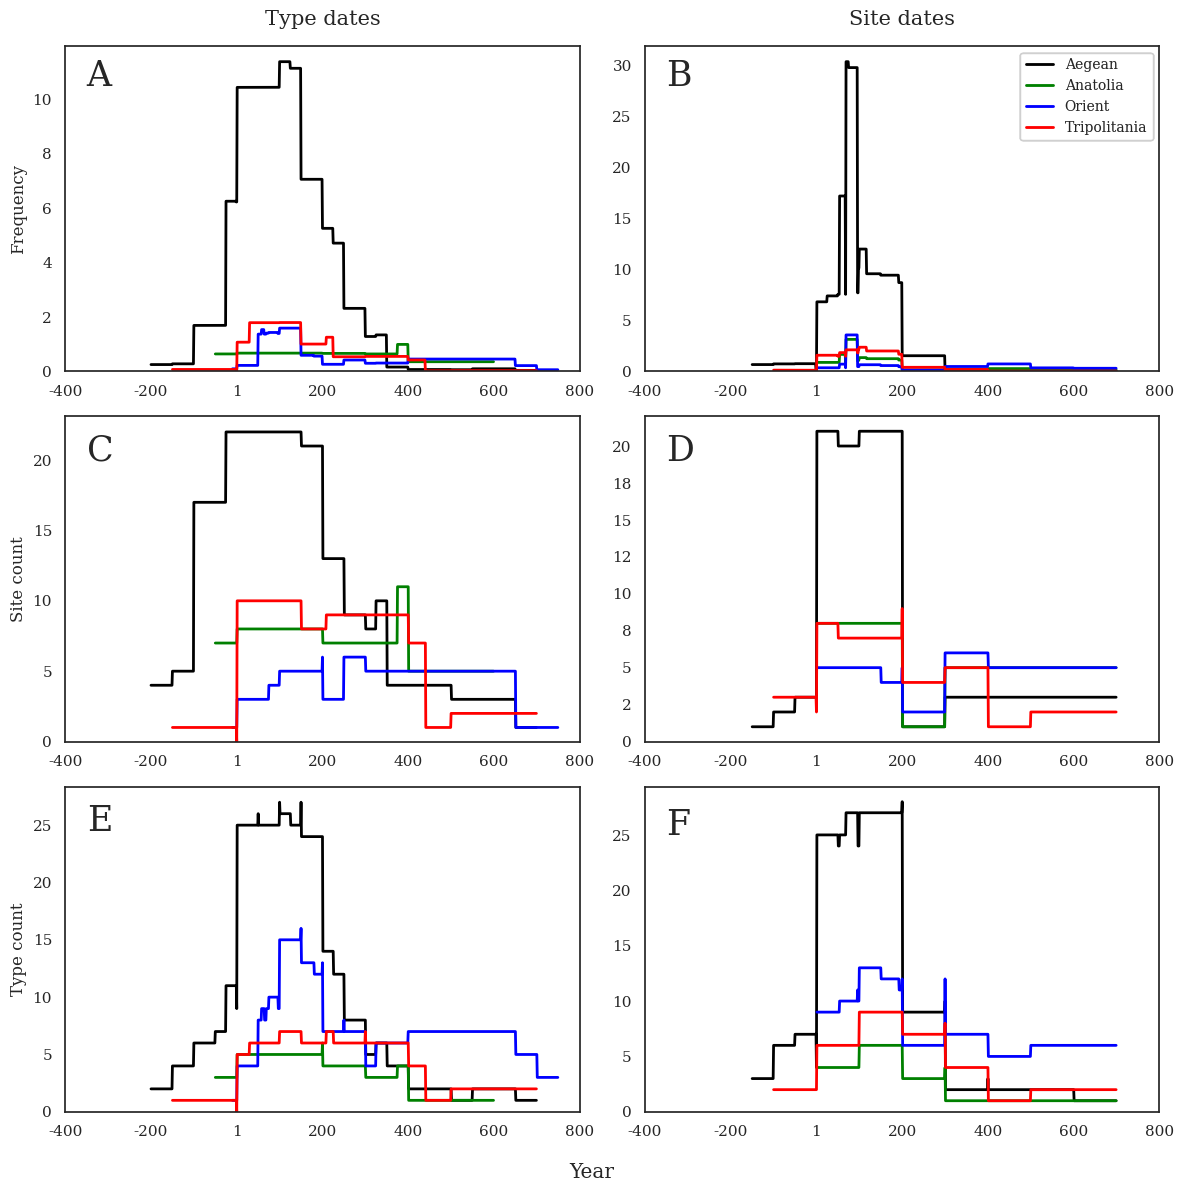

In [6]:
sns.set_style("white", {"font.family":"serif", "font.serif":"Times New Roman"}) 

fig, axs= plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

axs[0, 0].set_xlim([-400, 800])
axs[0, 1].set_xlim([-400, 800])
axs[1, 0].set_xlim([-400, 800])
axs[1, 1].set_xlim([-400, 800])
axs[2, 0].set_xlim([-400, 800])
axs[2, 1].set_xlim([-400, 800])

for ax, df in zip(axs.ravel(), list_of_dfs):
    plot_graph(dicts_of_df = df,
               palette=["black", "green", "blue", "red"],
               ax = ax,
               linewidth = 2)
               
    ax.set_ylim(0, None)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))  
    ax.set_xlabel(None)
    ax.get_legend().remove()
    ax.set_ylabel(None)
    ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
    handles, labels = ax.get_legend_handles_labels() 
    fig.legend(handles, labels,  bbox_to_anchor=(0.973, 0.957), fontsize = 10)

axs[0,0].set_ylabel("Frequency")
axs[1,0].set_ylabel("Site count")
axs[2,0].set_ylabel("Type count")

axs[0, 0].set_title(label = "Type dates", size=15, y=1.04)
axs[0, 1].set_title(label = "Site dates", size=15, y=1.04)

axs[0, 0].text(-350, 10.5, "A", fontsize = 25)
axs[0, 1].text(-350, 28, "B", fontsize = 25)
axs[1, 0].text(-350, 20, "C", fontsize = 25)
axs[1, 1].text(-350, 19, "D", fontsize = 25)
axs[2, 0].text(-350, 24.5, "E", fontsize = 25)
axs[2, 1].text(-350, 25, "F", fontsize = 25)

fig.supxlabel("Year")

plt.tight_layout()
plt.savefig("../../figs/Fig5a-f.png")